#  Prediction of Loan Repayment

### Hanah Chang

## 1. Introduction

For this project, we are going to predict whether or not the borrower paid back his or her loan in full using publicly available data from [LendingClub.com](www.lendingclub.com). 
LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission, and to offer loan trading on a secondary market.  

Key variables are :

- credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise
- purpose: The purpose of the loan 
- int.rate: The interest rate of the loan, as a proportion
- installment: The monthly installments owed by the borrower
- log.annual.inc: The natural log of the self-reported annual income of the borrower
- dti: The debt-to-income ratio of the borrower 
- fico: The FICO credit score of the borrower
- days.with.cr.line: The number of days the borrower has had a credit line.
- revol.bal: The borrower's revolving balance 
- revol.util: The borrower's revolving line utilization rate 
- inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months
- delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years
- pub.rec: The borrower's number of derogatory public records

our target variable is 'not.fully.paid', where 1 if the customer failed to pay in full, 0 otherwise.


## 2. Data & Library

Our dataset has 9578 observations and 14 attributes. 8,045 borrowers have paid in full, and the rest failed at repayment. 

In [96]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [97]:
df = pd.read_csv('lendingclub.csv')

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [99]:
df.shape

(9578, 14)

In [100]:
df['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

## 3. Explanatory Analysis 

Below histogram shows distribution of data by FICO scores. We can see that there are some spikes. It is because the FICO organization scores population in a way that certain points to have a larger distribution. 

We can see that FICO score distribution for borrowers who paid in full and who did not, show similar distribution.

Text(0.5, 0, 'FICO')

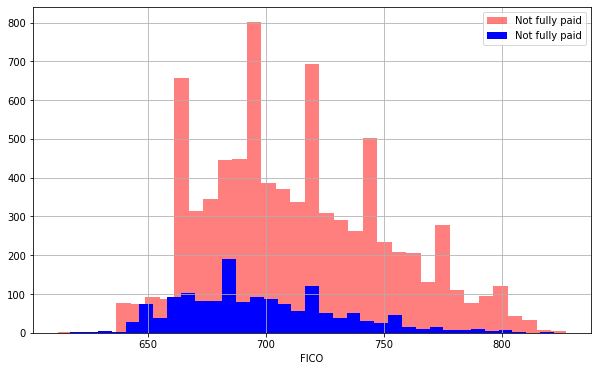

In [101]:
plt.figure(figsize =(10,6))
df[df['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',bins=35
                                        , label = 'Not fully paid')
df[df['not.fully.paid']==1]['fico'].hist(color = 'blue', bins=35
                                         , label = 'Not fully paid')
plt.legend()
plt.xlabel('FICO')

From chart below, we can see that the most popular reason for loan is debt consolidation for borrowers paid in full and borrowers who did not. 

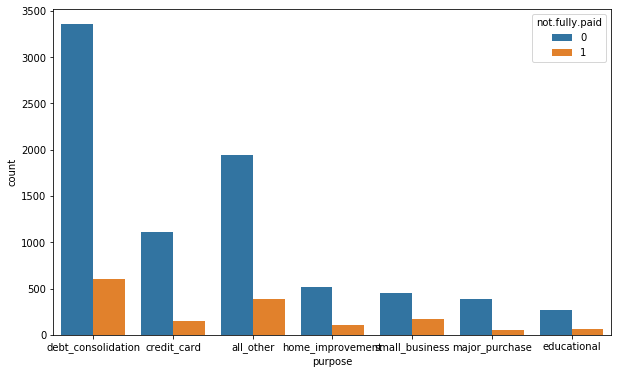

In [102]:
plt.figure(figsize=(10,6))
sns.countplot(x='purpose',hue='not.fully.paid', data=df)

Now we are going to look at FICO score and interest rates. As the borrower's FICO score increases, interest rate he or she has to pay off tends to decrease. The trend is same whether you paid in full of or not 

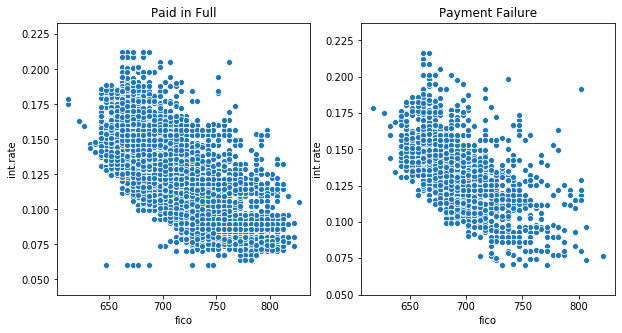

In [103]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.scatterplot(x='fico',y='int.rate',data=df[df['not.fully.paid']==0])
plt.title("Paid in Full")
plt.subplot(1,2,2)
sns.scatterplot(x='fico',y='int.rate',data=df[df['not.fully.paid']==1])
plt.title("Payment Failure")
plt.show()

## 4. Data Cleaning

There is one categorical variable 'purpose' in our dataset. We are going to convert the variable into dummy variables in order to feed them onto our classification algorithm. Note that we set drop_first=True, in order to avoid multicollinearity issues.

In [104]:
df2 = pd.get_dummies(df, columns=['purpose'],drop_first=True)

In [105]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

## 5. Decision Tree, Random Forest - Training / Optimizing

We are going to train our model using two algorithms - Decision Tree and Random Forest. We expect the Random Forest will throw a better result since the algorithm overcomes Decision Tree's overfitting problem by taking averages of multiple predictions from multiple random decision trees.

First, we split the dataset into training/testing dataset.

In [106]:
x = df2.drop(['not.fully.paid'],axis =1)
y = df2['not.fully.paid']

In [107]:
from sklearn.model_selection import train_test_split 

In [108]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state=101)

In [109]:
print("x_train", x_train.shape)
print("y_train",y_train.shape)
print("x_test",x_test.shape)
print("y_test",y_test.shape)

x_train (6704, 18)
y_train (6704,)
x_test (2874, 18)
y_test (2874,)


Training a Decision Tree Model

In [110]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

We can obtain 'feature importance' from RandomForestClassifier. We can see that the variable 'dti' has the highest impact when it comes to training decision tree.  

In [111]:
feature_importances = pd.DataFrame(DT.feature_importances_,
                                   index=x_train.columns,
                                  columns=['importance']).sort_values('importance', ascending = False)
print(feature_importances)

                                      importance
dti                          0.12397567004741318
days.with.cr.line            0.12227331428502101
installment                  0.11952349888714832
revol.bal                    0.11857624779644893
log.annual.inc               0.11499151285360966
int.rate                     0.10159388454726773
revol.util                   0.10145457202281978
fico                         0.06845231255194434
inq.last.6mths              0.035043450142360266
credit.policy               0.027124834865616322
purpose_debt_consolidation  0.016149520458393903
delinq.2yrs                 0.014397237676768792
purpose_small_business      0.007632952224329998
purpose_educational         0.006838145609361624
purpose_home_improvement    0.006390381877804181
pub.rec                     0.006196472918779799
purpose_credit_card         0.005786083472361395
purpose_major_purchase     0.0035999077625508496


Training a Random Forest Model
We fit two models using DecisionTreeClassifier and RandomForestClassifier. By setting n_estimators=600, we are pruning 600 trees and the result will take majority vote.

In [112]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=600)
RF.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## 6. Decision Tree, Random Forest - Evaluating

Both Decision Tree and Random Forest models showed 100% accuracy with training dataset. 

In [113]:
from sklearn.metrics import classification_report, confusion_matrix

In [114]:
y_predict_train_tree = DT.predict(x_train)
y_predict_train_forest =RF.predict(x_train)

In [115]:
cm_DT = confusion_matrix(y_train, y_predict_train_tree)
cm_RF = confusion_matrix(y_train, y_predict_train_forest)

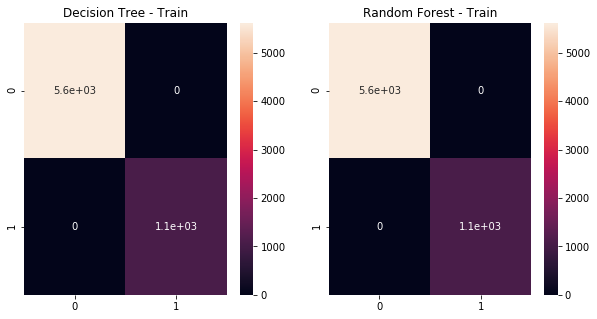

In [116]:
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
sns.heatmap(cm_DT,annot=True)
plt.title('Decision Tree - Train')

plt.subplot(1,2,2)
sns.heatmap(cm_RF,annot=True)
plt.title('Random Forest - Train')
plt.show()

When applied both models on test dataset, Decision Tree showed 74% of F1 score vs. Random Forest showed 78%. 

In [117]:
y_predict_test_tree = DT.predict(x_test)
y_predict_test_forest = RF.predict(x_test)

In [118]:
cm2_DT = confusion_matrix(y_test, y_predict_test_tree)
cm2_RF = confusion_matrix(ytest,y_predict_test_forest)

Text(0.5, 1, 'Random Forest - Test')

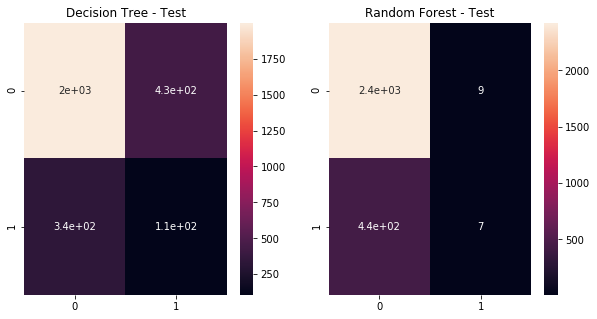

In [119]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.heatmap(cm2_DT,annot=True)
plt.title("Decision Tree - Test")
plt.subplot(1,2,2)
sns.heatmap(cm2_RF,annot=True)
plt.title("Random Forest - Test")

In [120]:
print(classification_report(y_test,y_predict_test_tree))
print(classification_report(y_test,y_predict_test_forest))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      2431
           1       0.20      0.24      0.22       443

    accuracy                           0.73      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.75      0.73      0.74      2874

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.44      0.02      0.03       443

    accuracy                           0.85      2874
   macro avg       0.64      0.51      0.47      2874
weighted avg       0.78      0.85      0.78      2874



## 7. Conclusion

In most cases, Random forest returns better result than decision trees because reducing the effect of noise and overcomes overfitting by taking average of all predictions. Our result also showed that Random forest outperformed.